In [1]:
pip install finterstellar

In [1]:
import finterstellar as fs

In [2]:
df = fs.fn_single(otp='OTP', symbol='NFLX', window='T')

In [3]:
df['Revenue Growth'] = ( df['Revenue'] - df['Revenue'].shift(12) ) / abs(df['Revenue'].shift(12))

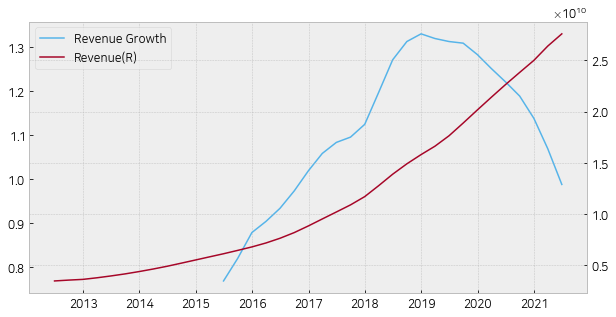

In [4]:
fs.draw_chart(df, left='Revenue Growth', right='Revenue')

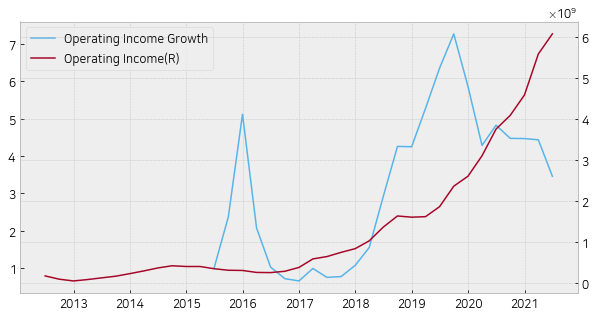

In [5]:
df['Operating Income Growth'] = ( df['Operating Income'] - df['Operating Income'].shift(12) ) / abs(df['Operating Income'].shift(12))
fs.draw_chart(df, left='Operating Income Growth', right='Operating Income')

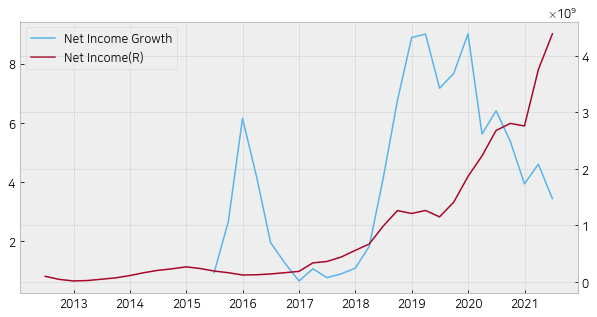

In [6]:
df['Net Income Growth'] = ( df['Net Income'] - df['Net Income'].shift(12) ) / abs(df['Net Income'].shift(12))
fs.draw_chart(df, left='Net Income Growth', right='Net Income')

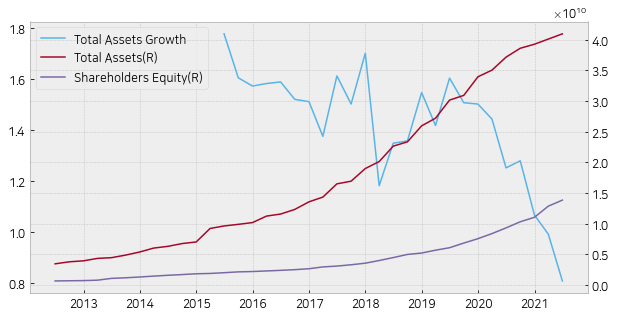

In [7]:
df['Total Assets Growth'] = ( df['Total Assets'] - df['Total Assets'].shift(12) ) / abs(df['Total Assets'].shift(12))
fs.draw_chart(df, left='Total Assets Growth', right=['Total Assets', 'Shareholders Equity'])

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 12.49%
Accumulated return: 128.05%
Investment period: 7.0yrs
Sharpe ratio: 0.59
MDD: -26.45%


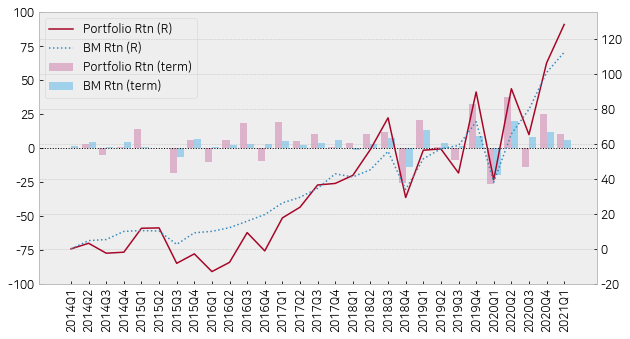

In [8]:
# Revenue Growth
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['Revenue Growth'] = ( data[t]['Revenue'] - data[prev_t]['Revenue'] ) / abs(data[prev_t]['Revenue'])
        s[t] = fs.fn_filter(data[t], by='Revenue Growth', floor=0, n=30, asc=False)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 4.88%
Accumulated return: 39.64%
Investment period: 7.0yrs
Sharpe ratio: 0.20
MDD: -45.14%


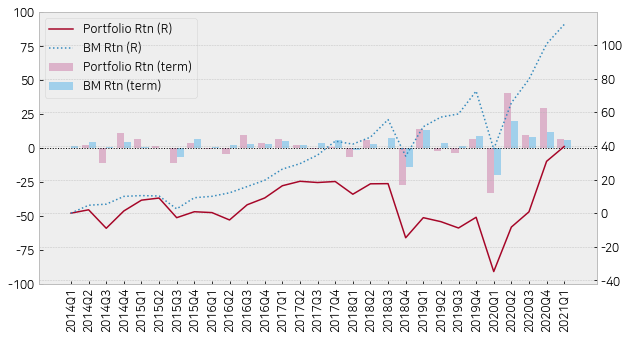

In [9]:
# Operating Income Growth
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['Operating Income Growth'] = ( data[t]['Operating Income'] - data[prev_t]['Operating Income'] ) / abs(data[prev_t]['Operating Income'])
        s[t] = fs.fn_filter(data[t], by='Operating Income Growth', floor=0, n=30, asc=False)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 2.89%
Accumulated return: 22.06%
Investment period: 7.0yrs
Sharpe ratio: 0.13
MDD: -35.39%


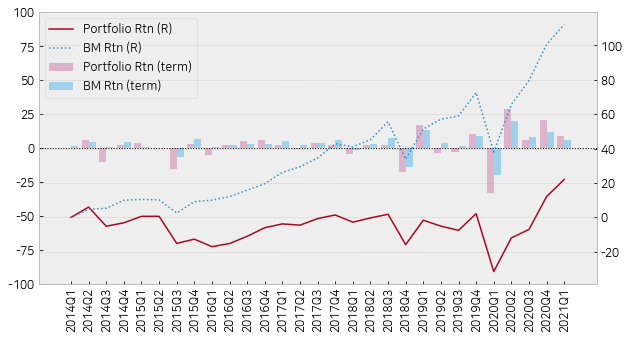

In [10]:
# Net Income Growth
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['Net Income Growth'] = ( data[t]['Net Income'] - data[prev_t]['Net Income'] ) / abs(data[prev_t]['Net Income'])
        s[t] = fs.fn_filter(data[t], by='Net Income Growth', floor=0, n=30, asc=False)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [11]:
# PER + Net Income Growth
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
        data[t]['Net Income Growth'] = ( data[t]['Net Income'] - data[prev_t]['Net Income'] ) / abs(data[prev_t]['Net Income'])
        s1[t] = fs.fn_score(data[t], by='PER', floor=1, cap=10, asc=True)
        s2[t] = fs.fn_score(data[t], by='Net Income Growth', floor=0, asc=False)
        s[t] = fs.combine_score(s1[t], s2[t], n=30)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 4.42%
Accumulated return: 35.36%
Investment period: 7.0yrs
Sharpe ratio: 0.16
MDD: -52.99%


In [12]:
# PBR + Operating Income Growth
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s = {}
signal = {}
y = 3
for t in terms:
    if list(terms).index(t) >= y*4:
        prev_t = fs.quarters_before(terms, t, y*4)
        data[t]['PBR'] = data[t]['Price_M3'] / ( data[t]['Shareholders Equity'] / data[t]['Shares'] )
        data[t]['Operating Income Growth'] = ( data[t]['Operating Income'] - data[prev_t]['Operating Income'] ) / abs(data[prev_t]['Operating Income'])
        s1[t] = fs.fn_score(data[t], by='PBR', floor=.1, cap=1, asc=True)
        s2[t] = fs.fn_score(data[t], by='Operating Income Growth', floor=0, asc=False)
        s[t] = fs.combine_score(s1[t], s2[t], n=30)
        signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.98%
Accumulated return: 60.46%
Investment period: 7.0yrs
Sharpe ratio: 0.22
MDD: -53.71%
